In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as pp
import matplotlib.pylab as pylab
import seaborn as sns

import time,datetime

import nltk
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re

from collections import Counter

import pickle

In [2]:
%matplotlib inline

In [10]:
tickets_path = '/home/yyang/data/z1_text_data_for_monash.json'

In [11]:
df = pd.read_json(tickets_path)

### data exploration

In [12]:
list(df)

[u'account_id',
 u'comments',
 u'created_at',
 u'description',
 u'subject',
 u'ticket_id']

In [6]:
pd.set_option('display.max_colwidth', -1)

In [205]:
df.shape

(246665, 6)

In [13]:
df[(df.iloc[:,2] >= datetime.date(2011, 1, 1)) & (df.iloc[:,2] < datetime.date(2012, 1, 1))].shape

(17, 6)

In [14]:
df[(df.iloc[:,2] >= datetime.date(2012, 1, 1)) & (df.iloc[:,2] < datetime.date(2013, 1, 1))].shape

(54, 6)

In [15]:
df[(df.iloc[:,2] >= datetime.date(2013, 1, 1)) & (df.iloc[:,2] < datetime.date(2014, 1, 1))].shape

(424, 6)

In [16]:
df[(df.iloc[:,2] >= datetime.date(2014, 1, 1)) & (df.iloc[:,2] < datetime.date(2015, 1, 1))].shape

(2687, 6)

In [17]:
df[(df.iloc[:,2] >= datetime.date(2015, 1, 1)) & (df.iloc[:,2] < datetime.date(2016, 1, 1))].shape

(243483, 6)

In [5]:
dfplot = df.set_index('created_at', drop=False)

In [6]:
pylab.rcParams['figure.figsize'] = 20, 5

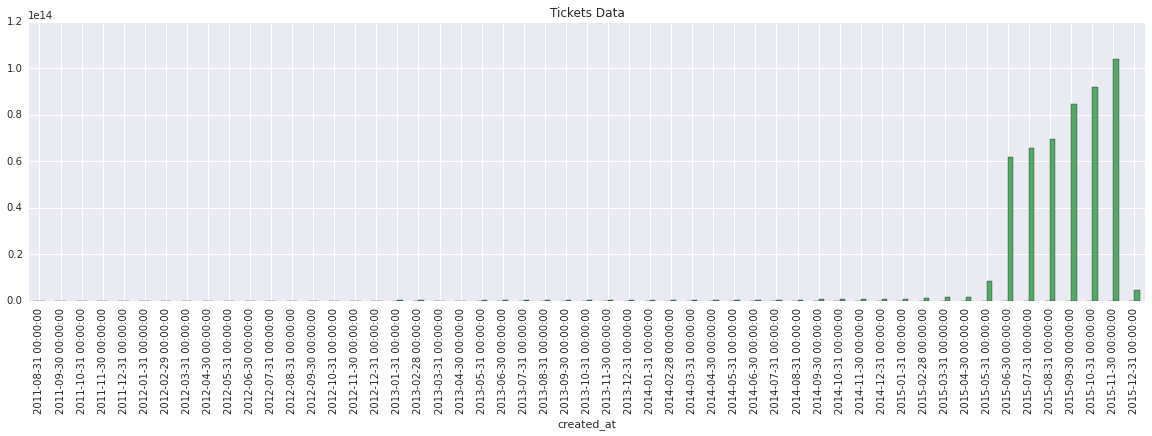

In [8]:
dfplot.resample('M',how=sum).plot(kind="bar",legend=None,title="Tickets Data")

In [25]:
df[(df.iloc[:,2] >= datetime.date(2015, 6, 1)) & (df.iloc[:,2] < datetime.date(2015, 12, 1))].shape

(233558, 6)

In [8]:
df[(df.iloc[:,2] >= datetime.date(2015, 6, 1)) & (df.iloc[:,2] < datetime.date(2015, 7, 1))].shape

(36641, 6)

In [9]:
df[(df.iloc[:,2] >= datetime.date(2015, 7, 1)) & (df.iloc[:,2] < datetime.date(2015, 8, 1))].shape

(36629, 6)

In [10]:
df[(df.iloc[:,2] >= datetime.date(2015, 8, 1)) & (df.iloc[:,2] < datetime.date(2015, 9, 1))].shape

(36072, 6)

In [11]:
df[(df.iloc[:,2] >= datetime.date(2015, 9, 1)) & (df.iloc[:,2] < datetime.date(2015, 10, 1))].shape

(40688, 6)

In [12]:
df[(df.iloc[:,2] >= datetime.date(2015, 11, 1)) & (df.iloc[:,2] < datetime.date(2015, 12, 1))].shape

(42768, 6)

### retrieve the needed tickets and sort by date

In [10]:
tickets_data = df[(df.iloc[:,2] >= datetime.date(2015, 6, 1)) & (df.iloc[:,2] < datetime.date(2015, 12, 1))]

In [11]:
sorted_tickets = tickets_data.set_index('created_at', drop=False)

In [12]:
sorted_tickets.sort_index(inplace=True)

### extract texts from data

In [13]:
textdf = sorted_tickets.loc[:,('subject','description','comments')]

In [14]:
textdf['combine'] = textdf[['subject','description','comments']].apply(lambda x: ' '.join(x), axis=1)

In [15]:
texts = textdf['combine']

## data cleaning

### remove words not in English, and symbols, urls, emails

In [7]:
englishwords = set(nltk.corpus.words.words())

In [8]:
len(englishwords)

235892

In [17]:
only_eng = [[word for word in text.lower().split() if word in englishwords] for text in texts]

In [37]:
texts = only_eng

### remove common words, and abbreviations, prefix, suffix

In [3]:
stoplist = set(stopwords.words('english'))

In [5]:
len(stoplist)

127

In [39]:
stoplist.update(['re','hi','oh','yet','could','let','must','would','may','might','us',
                 'de','en','el','la','un','al','si','es','da','em','se','um','per','via','sans','para','sie','da',
                 'ich','lo','das','te','tu','wir','ist','na','las','di','ha','kan','er','mi','ya','om'])

In [40]:
no_comm = [[word for word in text if word not in stoplist] for text in texts]

In [41]:
texts = no_comm

### stemming

In [21]:
# count unique words before stemming
for_fun = [val for sublist in texts for val in sublist]
print len(Counter(for_fun))

23466


In [22]:
stemmed = [[WordNetLemmatizer().lemmatize(word) for word in text] for text in texts] # works for plural 

In [23]:
stemmed = [[WordNetLemmatizer().lemmatize(word,'v') for word in text] for text in texts] # works for tense

In [24]:
texts = stemmed

### remove single characters

In [26]:
no_single = [[re.sub(r'^.$', '', word) for word in text] for text in texts]

In [28]:
# remove empty lists including [u'']
no_single = [[word.encode('utf-8') for word in text] for text in no_single]
no_single = [filter(None, word) for word in no_single]

In [31]:
texts = no_single

## save cleaned data

In [38]:
with open('/home/yyang/data/stemmed_wordnet.mm', 'wb') as f:
    pickle.dump(texts, f)